#### 該文件包含1,338個案例，即目前已經登記過的保險計劃受益者、病人特點和計劃計入的總醫療費用特徵:

* age:表示主要受益者年齡
* sex:性別
* bmi:身體質量指數,理想BMI在18.5~24.9之間
* children:表示保險計劃中所包括的孩子/受撫養者的數量
* smoker:表示被保險人是否經常吸煙
* region:受益者在美國的居住地-東北(northeast), 東南(sotheast), 西南(southwest)和東北(northwest)
* charges:醫療費用

#### 目的:檢測與醫療費用相關之變量，找出在醫療費用上具高風險的人

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.loc[:, 'region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df.loc[:, 'children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [11]:
df.loc[:, 'smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [3]:
new_df = df
new_df.loc[df['sex']=='male', 'sex'] = 1
new_df.loc[df['sex']=='female', 'sex'] = 0

new_df.loc[df['smoker']=='yes', 'smoker'] = 1
new_df.loc[df['smoker']=='no', 'smoker'] = 0

new_df['regionX'] = pd.Series()
new_df['regionY'] = pd.Series()
new_df.loc[df['region']=='northeast', 'regionX'] = 1
new_df.loc[df['region']=='northeast', 'regionY'] = 1

new_df.loc[df['region']=='northwest', 'regionX'] = -1
new_df.loc[df['region']=='northwest', 'regionY'] = 1

new_df.loc[df['region']=='southeast', 'regionX'] = 1
new_df.loc[df['region']=='southeast', 'regionY'] = -1

new_df.loc[df['region']=='southwest', 'regionX'] = -1
new_df.loc[df['region']=='southwest', 'regionY'] = -1
new_df = new_df.drop('region', axis=1)

In [4]:
# OHE 方法一


# df_one_hot = pd.get_dummies(new_df, columns=['region'], prefix='region')
# df_one_hot['region_northeast'] = df_one_hot['region_northeast'].astype(int)
# df_one_hot['region_northwest'] = df_one_hot['region_northwest'].astype(int)
# df_one_hot['region_southeast'] = df_one_hot['region_southeast'].astype(int)
# df_one_hot['region_southwest'] = df_one_hot['region_southwest'].astype(int)
# df_one_hot.head()

# df_one_hot = pd.get_dummies(df_one_hot, columns=['smoker'], prefix='smoker')
# df_one_hot['smoker_yes'] = df_one_hot['smoker_yes'].astype(int)
# df_one_hot['smoker_no'] = df_one_hot['smoker_no'].astype(int)
# df_one_hot.head()


In [5]:

y = np.log10(new_df.iloc[:, 5].values.reshape(-1,1)) # 轉換成1個column

# X1 = df_one_hot.iloc[:, 0:5]
# X2 = df_one_hot.iloc[:, 6:]
X = new_df.drop('charges', axis=1)

STANDARD = True
if STANDARD:
    scaler_new = StandardScaler()
    X = scaler_new.fit_transform(X)
else:
    scaler_min_max = MinMaxScaler()
    X = scaler_min_max.fit_transform(X)

In [6]:
# 分割訓練和測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [7]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(1070, 7)
Shape of X_test:(268, 7)
Shape of y_train:(1070, 1)
Shape of y_test(268, 1)


<Axes: >

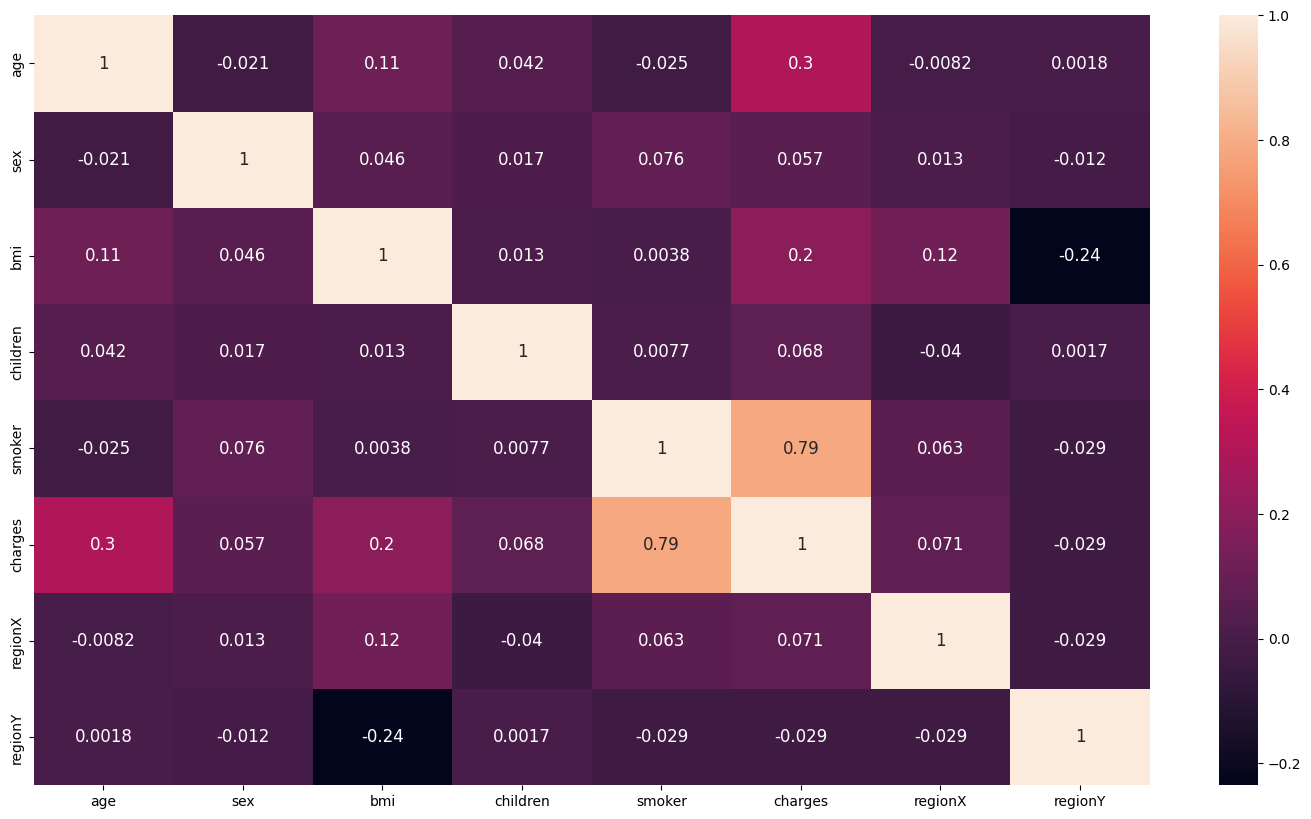

In [8]:
corrmat = new_df.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

In [9]:

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.8336226678810759
R2_score (test):  0.8737431883533943
RMSE:  0.1623858449804057
RMSE:  0.14331266768812984


In [20]:
lasso = Lasso(alpha = 0.00005) # , positive=True
poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = X_poly_test = []
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

lasso.fit(X_poly_train,y_train)

y_pred_lasso_train = lasso.predict(X_poly_train)
r2_score_lasso_train = lasso.score(X_poly_train, y_train)

y_pred_lasso_test = lasso.predict(X_poly_test)
r2_score_lasso_test = lasso.score(X_poly_test, y_test)

rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print("coef：")
for i, j in zip(new_df.columns, lasso.coef_):
    print(i, j)

print("R2_score (train): ",r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("train_RMSE: ", rmse_lasso_train)
print("test_RMSE: ", rmse_lasso_test)

coef：
age 0.0
sex 0.20250583892410645
bmi -0.017727370711423947
children 0.03677212845568614
smoker 0.06446296971854112
charges 0.2684949872465872
regionX 0.007996371736015983
regionY 0.028298515452946982
R2_score (train):  0.8336193997921775
R2_score (test): 0.8737513989166654
train_RMSE:  0.1623874398153645
test_RMSE:  0.14330800775398086


In [21]:
ridgeReg = Ridge(alpha=0.00005)

poly_reg = PolynomialFeatures(degree = 2)
X_poly_train = X_poly_test = []
X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

ridgeReg.fit(X_poly_train, y_train)

y_pred_ridge_train = ridgeReg.predict(X_poly_train)
r2_score_ridge_train = ridgeReg.score(X_poly_train, y_train)

y_pred_ridge_test = ridgeReg.predict(X_poly_test)
r2_score_ridge_test = ridgeReg.score(X_poly_test, y_test)

rmse_ridge_train = (np.sqrt(mean_squared_error(y_train, y_pred_ridge_train)))
rmse_ridge_test = (np.sqrt(mean_squared_error(y_test, y_pred_ridge_test)))

print("coef：")
for i, j in zip(new_df.columns, ridgeReg.coef_[0]):
    print(i, j)

print("R2_score (train): ",r2_score_ridge_train)
print("R2_score (test):", r2_score_ridge_test)
print("train_RMSE: ", rmse_ridge_train)
print("test_RMSE: ", rmse_ridge_test)

coef：
age 0.0
sex 0.20254664209503087
bmi -0.017779836081429242
children 0.03683541086708316
smoker 0.06456645038739137
charges 0.08551199877925209
regionX 0.008018814300395518
regionY 0.028275164340432916
R2_score (train):  0.8336199688816484
R2_score (test): 0.8737128249029906
train_RMSE:  0.16238716209950968
test_RMSE:  0.1433298992554077
